МФТИ ФИВТ: Курс Машинное Обучение (осень, 2016), Алексей Романенко, alexromsput@gmail.com, 

Outline:
    - Временные ряды
    - Настройка алгоритмов прогнозирования
    - Настройка моделей типа ЭСС
    - Настройка моделей из семества ARIMA
    - Композиции алгоритмов прогнозирования

**Key words:** 
    - временной ряд, уровень временного ряда, тренд, сезонность, структурный сдвиг
    - модели типа экспоненциальное сглаживание (ЭСС, модель Хольта, модель Уинтерса, модель Тейла-Вейджа, модель Уинтерса с аддитивной сезоннстью), 
    - модели типа ARIMA (ARMA, ARIMA, ARIMAX), сезонные варианты ARIMA
    - комбинирование алгоритмов прогнозирования (адаптивная целекция, адаптивная композиция, ЛАВР), агрегирующий алгоритм,
    - иерархическое прогнозирование, 
    - настройка параметров и оценка точности прогнозирования (estimation period, hold-out period, out-of-sample period)
    - автокорреляционная функция, частная автокорреляционная функция

In [1]:
import numpy as np
from datetime import datetime, timedelta
import pylab
import matplotlib.pyplot as plt
import pandas as pd
import math
import pandas.tseries.offsets as ofs
import warnings as w
from matplotlib import gridspec
import plotly.plotly as py

from IPython.display import Image

%matplotlib inline

## Временные ряды продаж

* Данные: 11 временных рядов продаж некоторых товаров в конкртном розничном магазине (один временной ряд - один товар).
     - Шаг временного ряда - день
     - История с 2005 по 2009 год

In [2]:
# ts = pd.read_csv('data/TimeSeries_Data10.csv', sep=',', decimal='.',parse_dates={'Timestamp': pd.to_datetime(['Dates'],dayfirst=True, errors='coerce')}, index_col='Timestamp')
ts = pd.read_csv('./data/TimeSeries_Data10.csv', sep=',', decimal='.', parse_dates=True, dayfirst=True, index_col='Dates')
ts.index.names=['Timestamp']
# ts = pd.read_csv('./data/TimeSeries_Data10.csv', sep=',', decimal='.')
ts = ts.sort_index() # отсортируем индексы
ts.head()

,Item: 165,Item: 969,Item: 2653,Item: 2654,Item: 2692,Item: 2695,Item: 2697,Item: 2765,Item: 2767,Item: 2806,Item: 2808
Timestamp,,,,,,,,,,,
2005-01-11,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-12,NaN,5.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-13,NaN,2.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-14,NaN,42.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-15,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Конкретный отрезок временного ряда
ts[-50:-40]

,Item: 165,Item: 969,Item: 2653,Item: 2654,Item: 2692,Item: 2695,Item: 2697,Item: 2765,Item: 2767,Item: 2806,Item: 2808
Timestamp,,,,,,,,,,,
2009-01-12,6.0,5.0,NaN,13.0,9.0,2.0,5.0,2.0,NaN,NaN,NaN
2009-01-13,2.0,3.0,NaN,16.0,10.0,5.0,1.0,13.0,NaN,NaN,NaN
2009-01-14,6.0,5.0,0.0,9.0,3.0,3.0,0.0,2.0,NaN,NaN,NaN
2009-01-15,8.0,18.0,11.0,6.0,5.0,11.0,1.0,2.0,NaN,NaN,NaN
2009-01-16,9.0,6.0,20.0,5.0,6.0,3.0,6.0,19.0,NaN,NaN,NaN
2009-01-17,1.0,17.0,24.0,12.0,11.0,5.0,3.0,7.0,NaN,NaN,NaN
2009-01-18,8.0,NaN,17.0,5.0,8.0,11.0,6.0,7.0,NaN,NaN,NaN
2009-01-19,2.0,NaN,2.0,14.0,2.0,9.0,9.0,1.0,NaN,NaN,NaN
2009-01-20,2.0,2.0,3.0,8.0,NaN,4.0,5.0,10.0,NaN,NaN,NaN


In [4]:
# Конкретный отрезок временного ряда
ts.ix['2009-01-01':'2009-01-10']

,Item: 165,Item: 969,Item: 2653,Item: 2654,Item: 2692,Item: 2695,Item: 2697,Item: 2765,Item: 2767,Item: 2806,Item: 2808
Timestamp,,,,,,,,,,,
2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-02,0.0,1.0,9.0,8.0,5.0,5.0,3.0,20.0,NaN,NaN,NaN
2009-01-03,7.0,6.0,6.0,14.0,12.0,3.0,2.0,1.0,NaN,NaN,NaN
2009-01-04,4.0,0.0,11.0,12.0,5.0,6.0,3.0,NaN,NaN,NaN,NaN
2009-01-05,7.0,7.0,9.0,20.0,10.0,5.0,2.0,14.0,NaN,NaN,NaN
2009-01-06,2.0,1.0,15.0,13.0,1.0,4.0,8.0,5.0,NaN,NaN,NaN
2009-01-07,1.0,3.0,8.0,12.0,2.0,2.0,7.0,5.0,NaN,NaN,NaN
2009-01-08,7.0,7.0,4.0,17.0,7.0,8.0,7.0,2.0,NaN,NaN,NaN
2009-01-09,2.0,NaN,26.0,12.0,7.0,8.0,5.0,5.0,NaN,NaN,NaN


#### Отобразим временные ряды

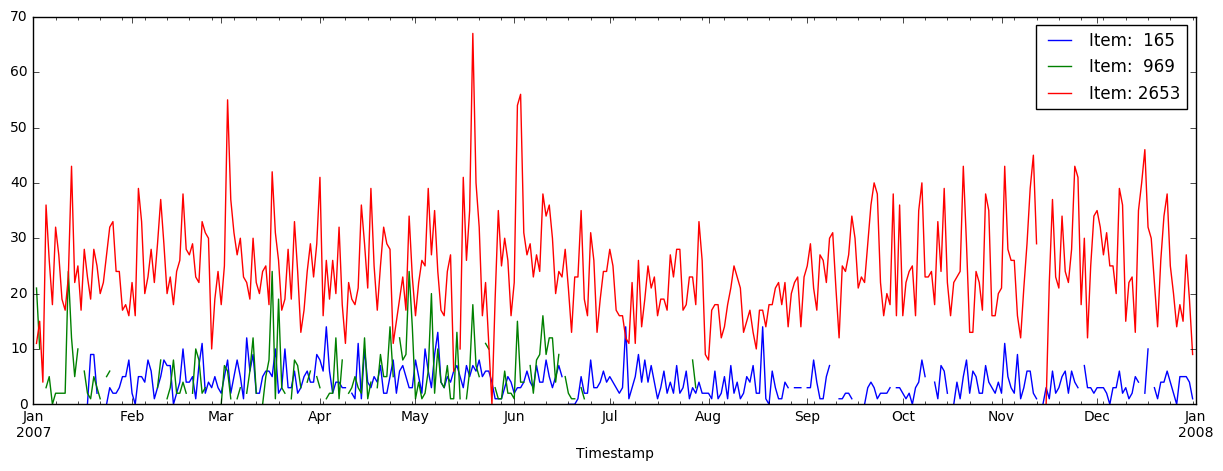

In [5]:
# fig = plt.figure()
ts.ix['2007-01-01':'2008-01-01', range(3)].plot(figsize=(15,5))
# to save the pictures
# plt.savefig('../Lecture_TS_Forecasting/pic/TS_Example.eps', bbox_inches='tight', pad_inches=0, format='eps', dpi=1000) 

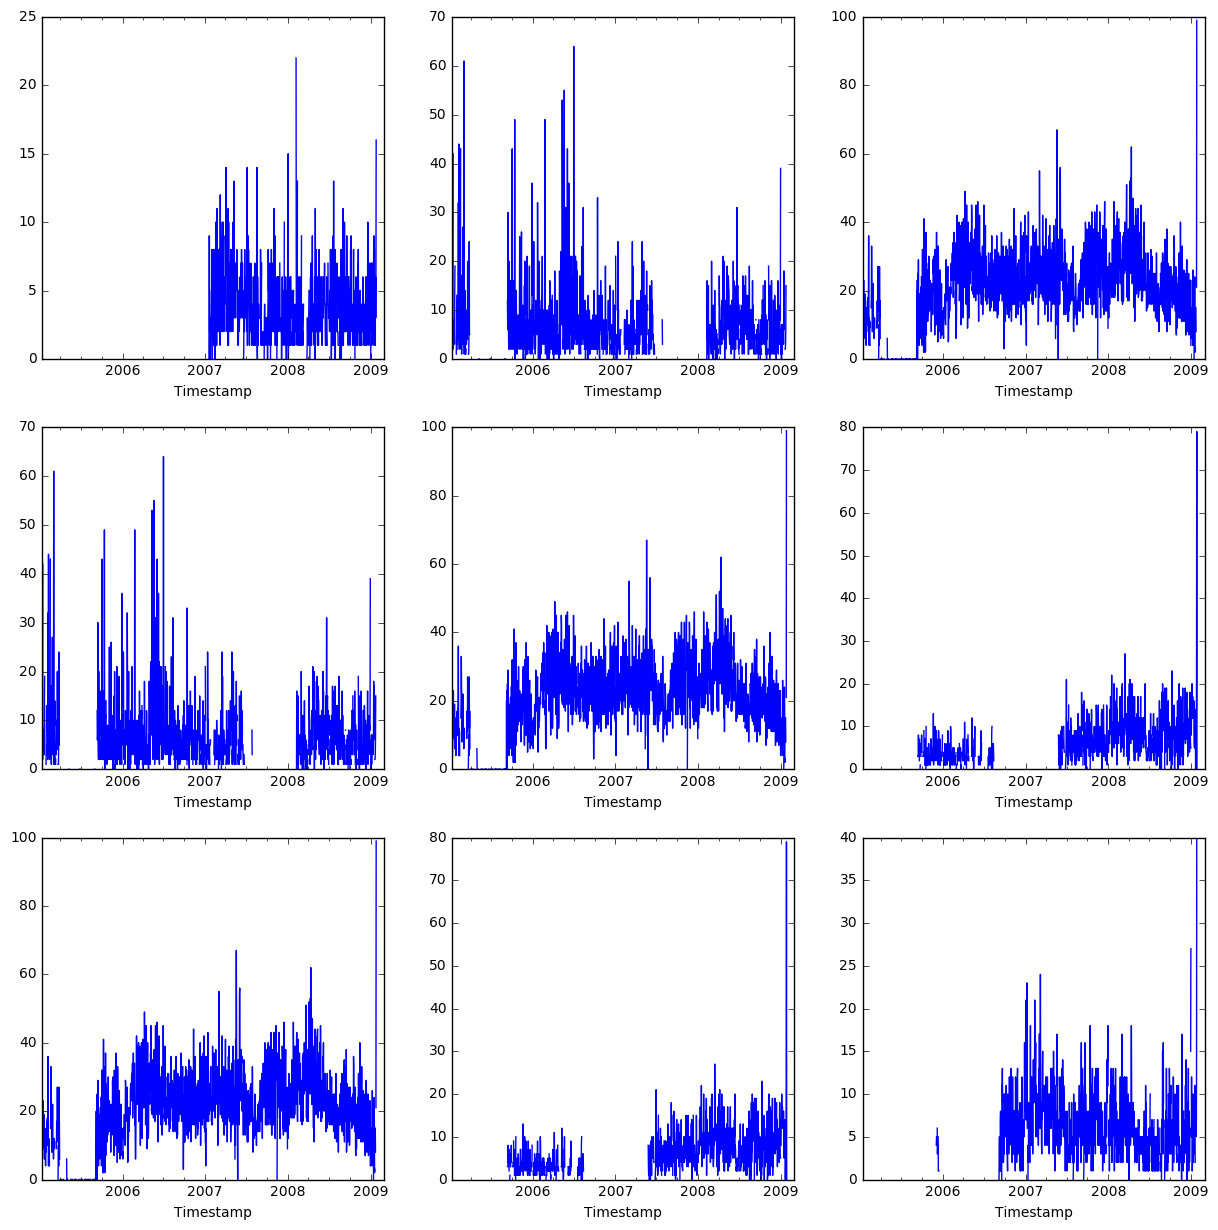

In [6]:
fig = plt.figure(figsize=(15,15))
gs = gridspec.GridSpec(3, 3)
for i in range(3):
    for j in range(3):
        fig.add_subplot(gs[i,j])
        ts.ix[:, i+j].plot()

**Вопросы** 
    - Какие закономерности наблюдаются?
    - Как построить прогноз для таких рядов?

## Временные ряды потребления электроэнергии

* Временные ряды потребления электроэнергии:
    - целевая переменная - объемы электроэнергии, производимые на электростанции
    - каждый временной ряд соответствует отдельному региону (Hub)
    - временной шаг - день
    - вспомогательные переменные (Temp1, Temp2 - температуры, Sunday, Saturday - разметка праздников, и др)

In [7]:
# energy_ts = pd.read_csv('./data/energy_consump.csv', sep=',', decimal='.', parse_dates={'Timestamp': pd.to_datetime('Date', errors='coerce')}, index_col='Timestamp')
energy_ts = pd.read_csv('./data/energy_consump.csv', sep=',', decimal='.', parse_dates=True, dayfirst=True, index_col='Date')
energy_ts.index.names=['Timestamp']
energy_ts.head()

,Hub,ZSP,EnergyConsump,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
Timestamp,,,,,,,,,,,,,,,,,,,,
2010-01-01,Center,FZSZOE27,147487.171,-17.8,-16.9,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,Center,FZSZOE27,155433.800,-17.8,-20.3,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-03,Center,FZSZOE27,164140.232,-16.4,-24.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,Center,FZSZOE27,171382.848,-10.2,-15.7,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,Center,FZSZOE27,170188.290,-7.2,-8.8,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Filter only Hub=Center and ZSP=FZSZOE27
energy_ts= energy_ts[(energy_ts['ZSP']=='FZSZOE27') & (energy_ts['Hub']=='Center')]
energy_ts.tail()

,Hub,ZSP,EnergyConsump,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
Timestamp,,,,,,,,,,,,,,,,,,,,
2015-05-23,Center,FZSZOE27,NaN,11.7,11.9,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-24,Center,FZSZOE27,NaN,12.4,12.8,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-25,Center,FZSZOE27,NaN,16.2,15.4,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-26,Center,FZSZOE27,NaN,18.7,17.3,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-27,Center,FZSZOE27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


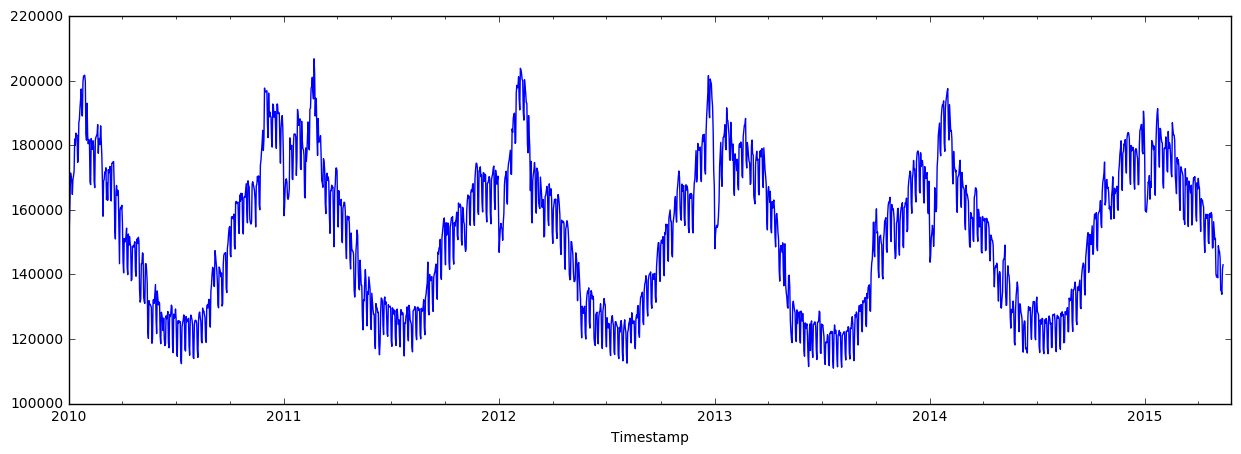

In [9]:
# See Year-Seasonality
energy_ts['EnergyConsump'].plot(figsize=(15,5))

# uncomment to save the figure
# plt.savefig('../Lecture_TS_Forecasting/pic/Energy_YearSeasonality.eps', bbox_inches='tight', pad_inches=0, format='eps', dpi=1000) 

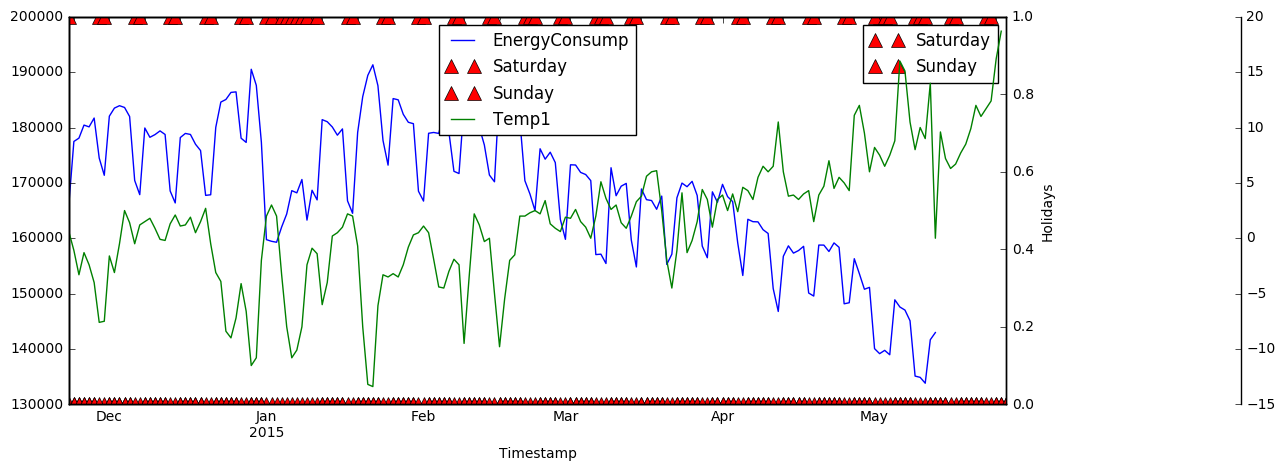

In [10]:
# See Week easonality
fig, ax = plt.subplots(figsize=(15,5))

ax2, ax3 = ax.twinx(), ax.twinx()
ax2.set_ylabel('Holidays')
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

energy_ts['EnergyConsump'].tail(186).plot(ax = ax,  style='b-')
energy_ts[['Saturday', 'Sunday']].tail(186).plot(ax = ax2, style='r', marker = '^', markersize = 10.0, linewidth=0.0)
energy_ts['Temp1'].tail(186).plot(ax = ax3,  style='g-')

lines = ax.get_lines() + ax2.get_lines() + ax3.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper center')
# uncomment to save the figure
# plt.savefig('../Lecture_TS_Forecasting/pic/Energy_WeekSeasonality.png', bbox_inches='tight', pad_inches=0) # 
# plt.savefig('../Lecture_TS_Forecasting/pic/Energy_WeekSeasonality.eps', bbox_inches='tight', pad_inches=0, format='eps', dpi=1000) 

**Вопросы** 
    - Какие закономерности наблюдаются?
    - Как построить прогноз для таких рядов?

## Обучение алгоритмов в задаче прогнозирования

### Различные функции потерь

In [11]:
# Quality functions
def qualitySSE(x,y):
    # Sum squared error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return ((x-y)**2).sum(), (x-y)**2

def qualityMSE(x,y):
    # Mean squared error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return ((x-y)**2).mean() , (x-y)**2

def qualityRMSE(x,y):
    # Root mean squared error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return (((x-y)**2).mean())**(0.5) , (x-y)**2

def qualityMAE(x,y):
    # Mean absolute error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return (x-y).abs().mean(), (x-y).abs()

def qualityMAPE(x,y):
    # Mean absolute percentage error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    qlt = ((x-y).abs()/x).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , (x-y).abs()

def qualityMACAPE(x,y):
    # Mean average corrected absolute percentage error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    qlt = (2*(x-y).abs()/(x+y)).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , (x-y).abs()

def qualityMedianAE(x,y):
    # Median absolute error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return ((x-y).abs()).median(), (x-y).abs()

### Train, test and validation

* В классическом ML делим всю выборку на 3 части:  learning sample (LS), validation set (VS) и test set (TS), например, в пропорции 50%, 25%, 25%)

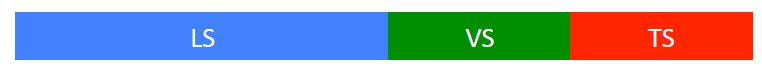

In [12]:
Image('pic/TrainTestValidate.png')

* настраиваем параметры моделей (fit models) на LS (using different learning algorithms or different complexity values)
* выбираем лучшую по точности на VS
* на выборке LS+VS настраиваем параметры лучшей модели
* оцениваем точность (assessment) модели на TS
* для работы в бою снова обучаем модели на LS+VS+TS – получаем финальную модель

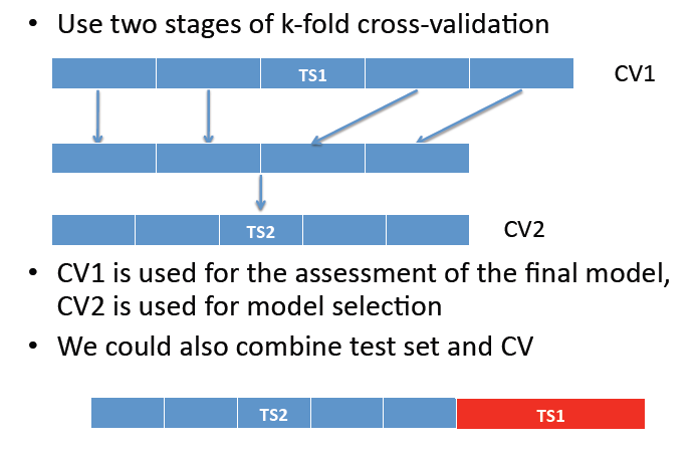

In [13]:
Image('pic/TwoStageCV.png')

** Вопрос**
    - Зачем нужен двух шаговый k-Fold? Иными словами, почему точность на CV2(VS) и на CV1(TS) будет отличаться?
     (см. AssessmentModel.ipnb)

### Estimation period, Hold-out sample (validation period), out-of-sample (test period)

** Вопросы:** 
    - Какие особенности разбиения обучающей выборки на train и test для данной задачи?
    - Что из себя представляет кросс-валидация?

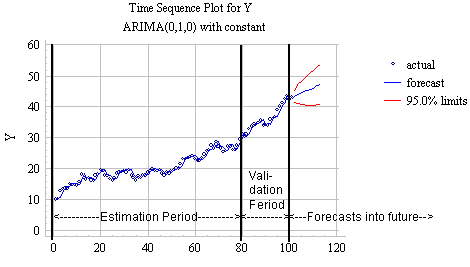

In [14]:
Image('pic/TS_EstimationTrainValidate.png')

https://people.duke.edu/~rnau/three.htm

#### При прогнозировании временных рядов (обычно):
 * обучение на estimation period происходит 1-step-ahead
 * выбор наилучшей модели прогнозирования на validation period (hold-out sample) 1-step-ahead
 * оценка точности предсказания на test period (forecast to future, out-of-sample) происходит h-step-ahead

# Экспоненциальное сглаживание

* Модель временного ряда:
$$\hat{y}_{t+1} = \alpha\cdot y_t+ (1-\alpha)\cdot \hat{y}_t$$

  Что может быть проще?




* Интегральная запись:
$$\hat{y}_{t+1} = \sum_{\tau=1}^t \alpha\cdot (1-\alpha)^{t-\tau}\cdot y_\tau$$

** Вопрос **
   Какие проблемы могут возникуть при прогнозировании коротких временных рядов?
   Hint: посчитайте сумму весов отсчётов временного ряда

In [15]:
# Пример реализации

# Simple Exponential Smoothing (ЭСС)
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter

def SimpleExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = x[0]
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(y):
                y=x[cntr]
            y = y*(1-alpha) + alpha*x[cntr]
            #else do not nothing
        FORECAST[cntr+h] = y
    return FORECAST

In [16]:
# Forecasting delay
h = 1
start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)

In [17]:
# ES params
Params ={'alpha':0.1}

# forecast
for cntr in ts.columns:
    x = ts[cntr]
    frc_ts[cntr] = SimpleExponentialSmoothing(x, h, Params)

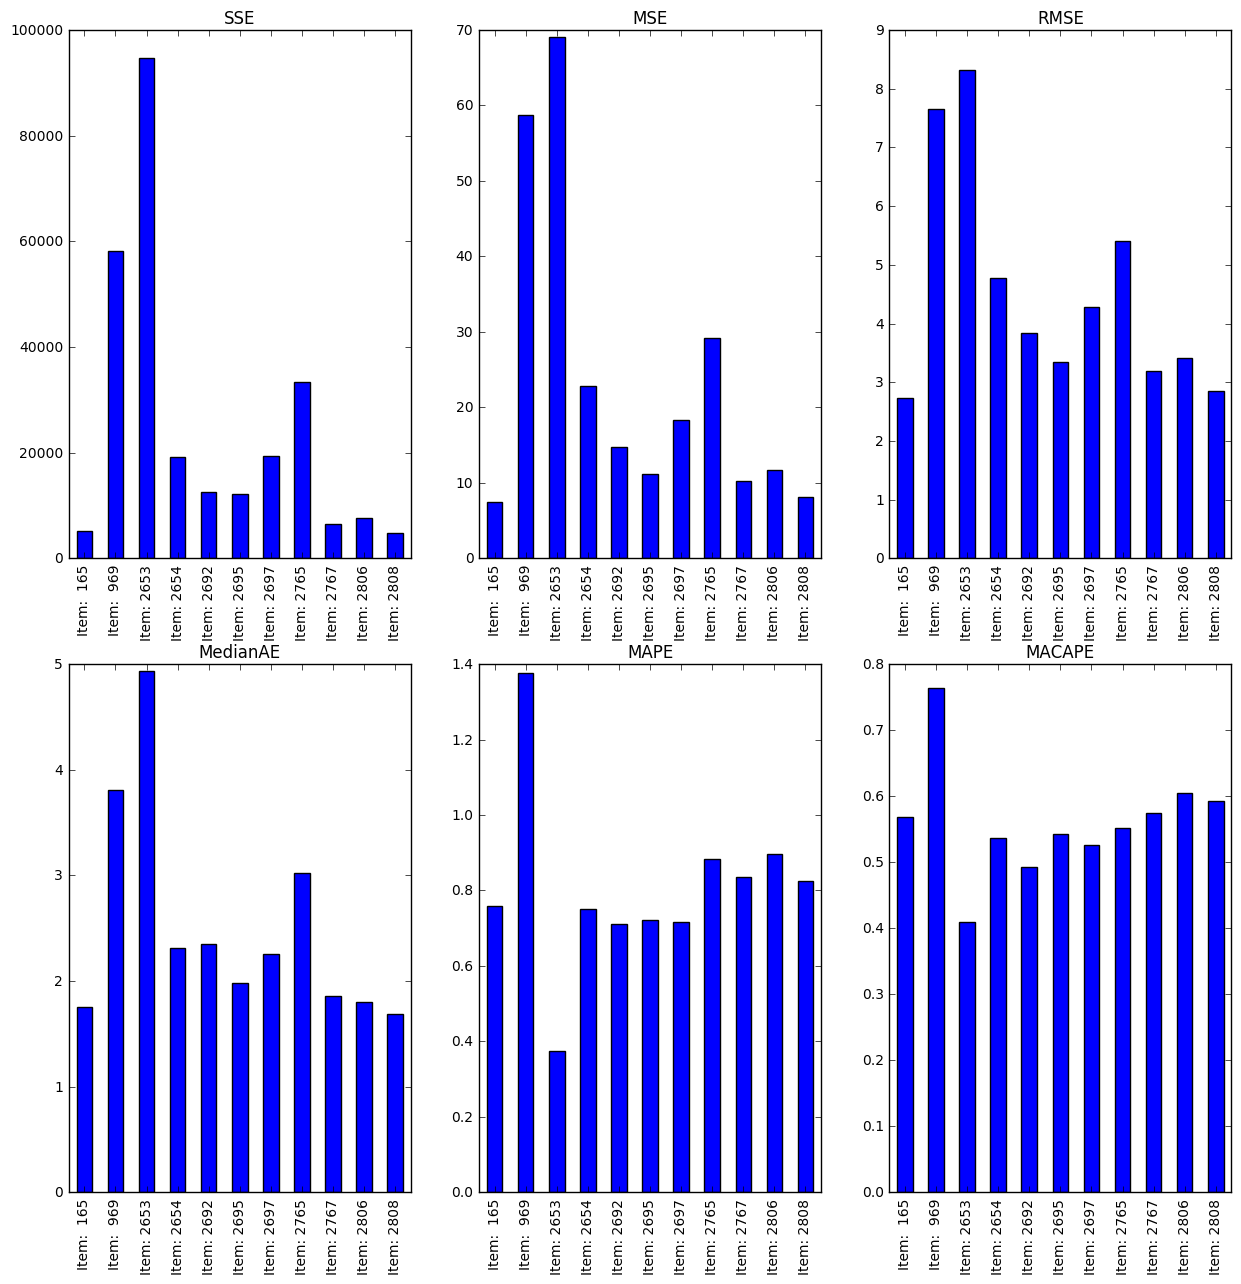

In [18]:
plt.figure(figsize=(15,15))

# Quality = [np.NaN]*len(ts.columns)
plt.subplot(2,3,1)
Quality, _ = qualitySSE(ts, frc_ts)
Quality.plot(kind='bar')
plt.title('SSE')

plt.subplot(2,3,2)
Quality, _ = qualityMSE(ts, frc_ts)
Quality.plot(kind='bar')
plt.title('MSE')

plt.subplot(2,3,3)
Quality, _ = qualityRMSE(ts, frc_ts)
Quality.plot(kind='bar')
plt.title('RMSE')

plt.subplot(2,3,4)
Quality, _ = qualityMedianAE(ts, frc_ts)
Quality.plot(kind='bar')
plt.title('MedianAE')

plt.subplot(2,3,5)
Quality, _ = qualityMAPE(ts, frc_ts)
Quality.plot(kind='bar')
plt.title('MAPE')

plt.subplot(2,3,6)
Quality, _ = qualityMACAPE(ts, frc_ts)
Quality.plot(kind='bar')
plt.title('MACAPE')

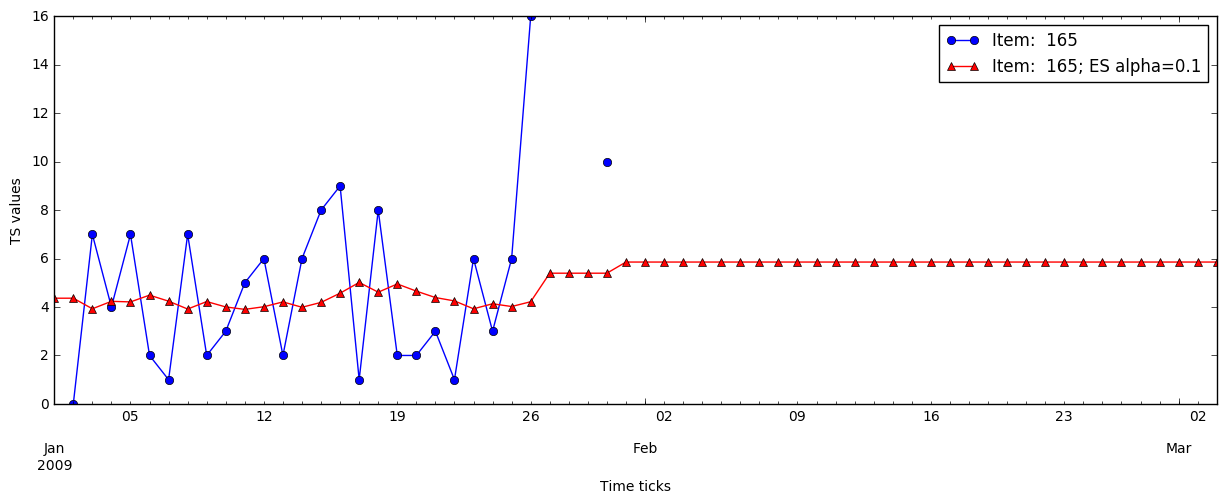

In [19]:
# show forecast alpha = 0.1
frc_ts.columns = ts.columns+'; ES alpha=0.1'
ts_num = 0 

ts[ts.columns[ts_num]].ix['2009-01-01':'2009-03-31'].plot(style='b', linewidth=1.0, marker='o')
frc_ts[frc_ts.columns[ts_num]].ix['2009-01-01':'2009-03-31'].plot(style='r-^', figsize=(15,5), linewidth=1.0)
plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()

#### Повторим для h=30

In [20]:
# forecast
h = 30
start = ts.index[-1]+timedelta(1)
end = ts.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)

for cntr in ts.columns:
    frc_ts[cntr] = SimpleExponentialSmoothing(ts[cntr], h, {'alpha':0.1})

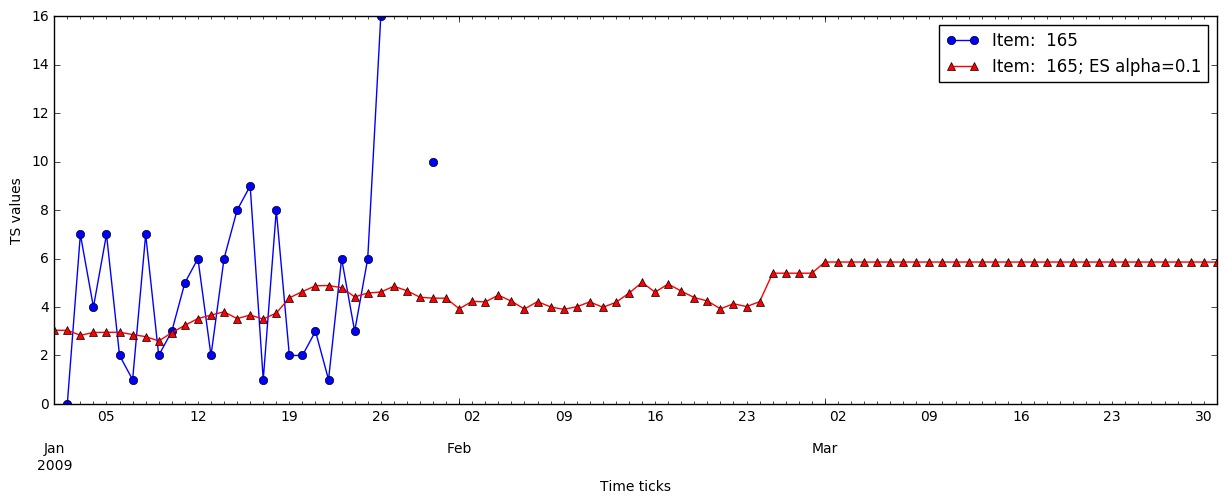

In [21]:
# show forecast h = 30, alpha = 0.1
frc_ts.columns = ts.columns+'; ES alpha=0.1'
ts_num = 0

ts[ts.columns[ts_num]].ix['2009-01-01':'2009-03-31'].plot(style='b', linewidth=1.0, marker='o')
frc_ts[frc_ts.columns[ts_num]].ix['2009-01-01':'2009-03-31'].plot(style='r-^', figsize=(15,5), linewidth=1.0)
plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()

#### Поиск оптимального $\alpha$ по скользящему контролю

In [22]:
#Fit parameters
h = 1
ALPHA = [0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01]
FRC_TS = dict()

for alpha in ALPHA:
    frc_ts = pd.DataFrame(index = ts.index.append(pd.date_range(ts.index[-1]+timedelta(1), ts.index[-1]+timedelta(h)))
                          , columns = ts.columns)
    for cntr in ts.columns:
        frc_ts[cntr] = SimpleExponentialSmoothing(ts[cntr], h, {'alpha':alpha})
    FRC_TS['ES alpha %.2f' % alpha] = frc_ts

#### Точность на всей истории

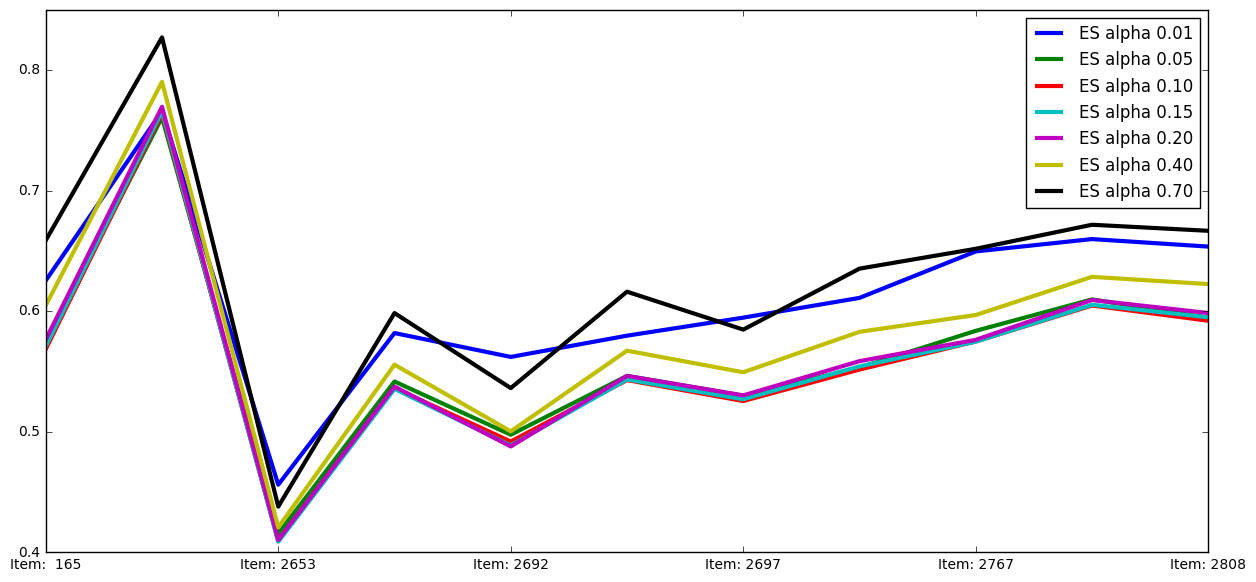

In [23]:
# compare ES parameters
QualityStr = pd.DataFrame(index = ts.columns, columns = FRC_TS.keys())

# Quality through 1500 steps
ix = range(len(ts.index))
for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_TS[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(ts.ix[ix], frc_ts.ix[ix])

QualityStr[sorted(QualityStr.columns)].plot(figsize = (15,7), linewidth=3.0)

* оптимальные значения $\alpha$ лежат около $0.1$ 

#### Ошибка в начальный момент

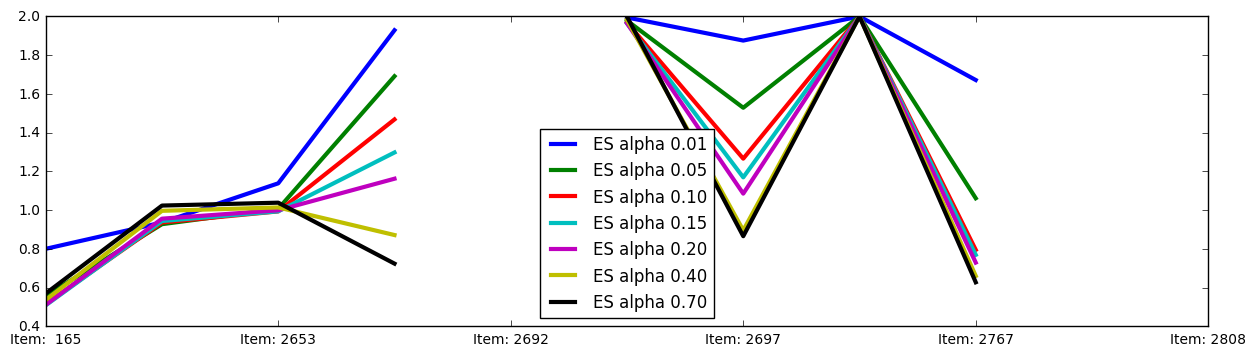

In [24]:
# Quality in first 100 steps
# ix = range(100)
for model in QualityStr.columns:
    frc_ts = FRC_TS[model]
    for ts_num in ts.columns:
        ix = pd.date_range(ts[ts_num].first_valid_index(), ts[ts_num].first_valid_index()+timedelta(150))
        QualityStr[model][ts_num],_ = qualityMACAPE(ts[ts_num].ix[ix], frc_ts[ts_num].ix[ix])

QualityStr[sorted(QualityStr.columns)].plot(figsize = (15,4), linewidth=3.0)

** Вопрос:**
        А почему точность на отдельных ВР не посчиталась?
        
        (Hint: посмотрите на функцию потерь)

* Посмотрим, что интересного в ВР под номером 3

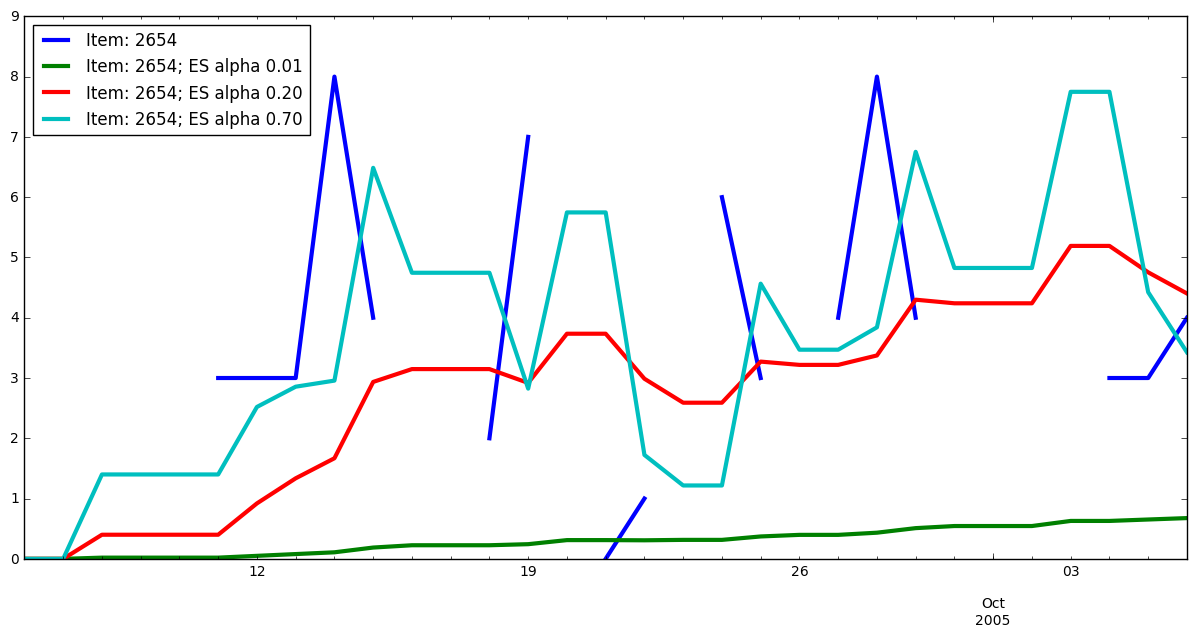

In [25]:
# ts VS forecast in first 100 steps
model_num = [0,4,6]  # [0,6], [0,4,6]
Models = sorted(FRC_TS.keys())

ts_num = 3 # 7
plot_ts = pd.DataFrame(index =ts.index)
plot_ts[ts.columns[ts_num]] = ts[ts.columns[ts_num]]
for model in model_num:
     frc_ts = FRC_TS[Models[model]]
     plot_ts[frc_ts.columns[ts_num]+'; '+Models[model]] = frc_ts[frc_ts.columns[ts_num]]

ix = pd.date_range(ts[ts.columns[ts_num]].first_valid_index()+timedelta(140), ts[ts.columns[ts_num]].first_valid_index()+timedelta(170))
plot_ts.ix[ix].plot(figsize = (15, 7), linewidth=3.0) # :250

### Несколько вариантов инициализации

* в начальный момент времени $\alpha$ делаем искуственно большим

In [26]:
def InitExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    AdaptationPeriod=Params['AdaptationPeriod']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = x[0]
    t0=0
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                y=x[t]
                t0=t
            if (t-t0+1)<AdaptationPeriod:
                y = y*(1-alpha*(t-t0+1)/(AdaptationPeriod)) + alpha*(t-t0+1)/(AdaptationPeriod)*x[t]
            y = y*(1-alpha) + alpha*x[t]
            #else do not nothing
        FORECAST[t+h] = y
    return FORECAST

* нормируем прогноз на величину $1 - (1-\alpha)^t$

In [27]:
def NormExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    
    y = 0
    norm = 0
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                norm=1  # iitialize when first data point comes
            norm = norm*(1-alpha)
            y = y*(1-alpha) + (alpha)*x[t]
        FORECAST[t+h] = y/(1-norm)
    return FORECAST

In [28]:
#Fit parameters
ALPHA = [0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01]
h = 1
rng = pd.date_range(ts.index[-1]+timedelta(1), ts.index[-1]+timedelta(h))

for alpha in ALPHA: 
    i_frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
    n_frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
#     Quality = [np.NaN]*len(ts)
    for cntr in ts.columns:
        i_frc_ts[cntr] = InitExponentialSmoothing(ts[cntr], h, {'alpha':alpha, 'AdaptationPeriod': 10})
        n_frc_ts[cntr] = NormExponentialSmoothing(ts[cntr], h, {'alpha':alpha})
    #Quality[cntr] = qualityRMSE(x, frc_ts[ts.columns[cntr]][:T])
    FRC_TS['IES alpha %.2f' % alpha] = i_frc_ts
    FRC_TS['NES alpha %.2f' % alpha] = n_frc_ts

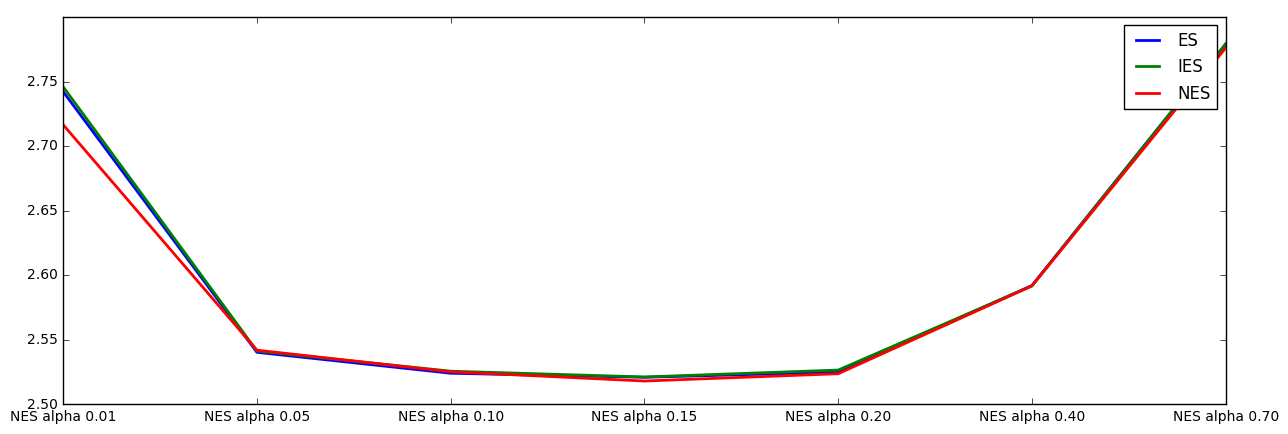

In [29]:
# compare ES methods
del QualityStr
QualityStr = pd.DataFrame(index = ts.columns, columns = sorted(FRC_TS.keys()))

for model in sorted(QualityStr.columns):
    frc_ts = FRC_TS[model]
    QualityStr[model],_ = qualityMedianAE(ts, frc_ts)

QualityStr[sorted(QualityStr.columns)[:7]].mean().plot(label='ES', linewidth=2.0)
QualityStr[sorted(QualityStr.columns)[7:14]].mean().plot(label='IES', linewidth=2.0)
QualityStr[sorted(QualityStr.columns)[14:]].mean().plot(label='NES', figsize = (15, 5), linewidth=2.0)
plt.legend()

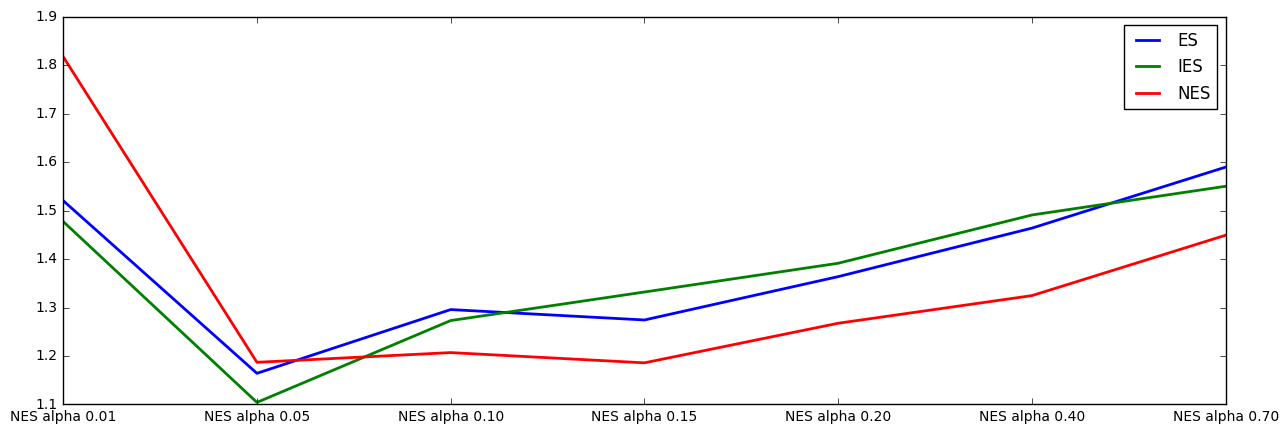

In [30]:
ix = range(50)
# compare ES methods in first 100 steps
QualityStr = pd.DataFrame(index = ts.columns, columns = sorted(FRC_TS.keys()))

for model in QualityStr.columns:
    frc_ts = FRC_TS[model]
    for ts_num in ts.columns:
        ix = pd.date_range(ts[ts_num].first_valid_index(), ts[ts_num].first_valid_index()+timedelta(50))
        QualityStr[model][ts_num],_ = qualityMedianAE(ts[ts_num].ix[ix], frc_ts[ts_num].ix[ix])

QualityStr[sorted(QualityStr.columns)[:7]].mean().plot(label='ES', linewidth=2.0)
QualityStr[sorted(QualityStr.columns)[7:14]].mean().plot(label='IES', linewidth=2.0)
QualityStr[sorted(QualityStr.columns)[14:21]].mean().plot(label='NES', figsize = (15, 5), linewidth=2.0)
plt.legend()

# Adaptive ES

#### Скользящий контрольный сигнал

$e_t = y_t - \hat{y}_t$

$\tilde{e}_t = \gamma e_{t-1} + (1-\gamma) \tilde{e}_{t-1}$

$\overline{e}_t = \gamma \left|e_{t-1}\right| + (1-\gamma) \overline{e}_{t-1}$

* Скользящий контрольный сигнал

$$K_t = \frac{\tilde{e}_t}{\overline{e}_t}$$

* для устойчивости к выбросам берём
$$\alpha_t = \left|K_{t-1}\right|$$

In [31]:
# AdaptiveExponentialSmoothing
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    AdaptivePeriod scalar> - adapation period for initialization
#    gamma<scalar in [0,1]> - parametr of cross validation

def AdaptiveExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    gamma = Params['gamma']
    AdaptationPeriod=Params['AdaptationPeriod']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = np.NaN
    t0= np.NaN
    e1= np.NaN
    e2= np.NaN
    Kt_1 = alpha
    K=alpha
    for t in range(0, T):
        if not math.isnan(x[t]):
            if math.isnan(y):
                y=x[t]
                t0=t
                e1=alpha
                e2 = 1
            else:
                if (t-t0)<h:
                    e1 = gamma*(x[t]-y)+(1-gamma)*e1
                    e2 = gamma*np.abs(x[t]-y)+(1-gamma)*e2
                else:
                    e1 = gamma*(x[t]-FORECAST[t])+(1-gamma)*e1
                    e2 = gamma*np.abs(x[t]-FORECAST[t])+(1-gamma)*e2
            
            if e2==0:
                K=alpha
            else:
                K=np.abs(e1/e2)

            alpha=Kt_1
            Kt_1=K

            if t<AdaptationPeriod:
                y = y*(1-alpha*(t-t0+1)/(AdaptationPeriod)) + alpha*(t-t0+1)/(AdaptationPeriod)*x[t]
            y = y*(1-alpha) + (alpha)*x[t]
            #else do not nothing
        FORECAST[t+h] = y
    return FORECAST

In [33]:
#Fit parameters
GAMMA = [0.1, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005]
alpha = 0.1

for gamma in GAMMA:
    a_frc_ts = pd.DataFrame(index = ts.index.append(rng), columns = ts.columns)
    
    for cntr in ts.columns:
        a_frc_ts[cntr] = AdaptiveExponentialSmoothing(ts[cntr], h, {'alpha':alpha, 'gamma': gamma, 'AdaptationPeriod':10})
    FRC_TS['AES gamma %.5f' % gamma] = a_frc_ts

In [34]:
# # del FRC_TS['AES gamma 0.0005']
# for item in sorted(FRC_TS.keys())[:6]:
#     del FRC_TS[item]

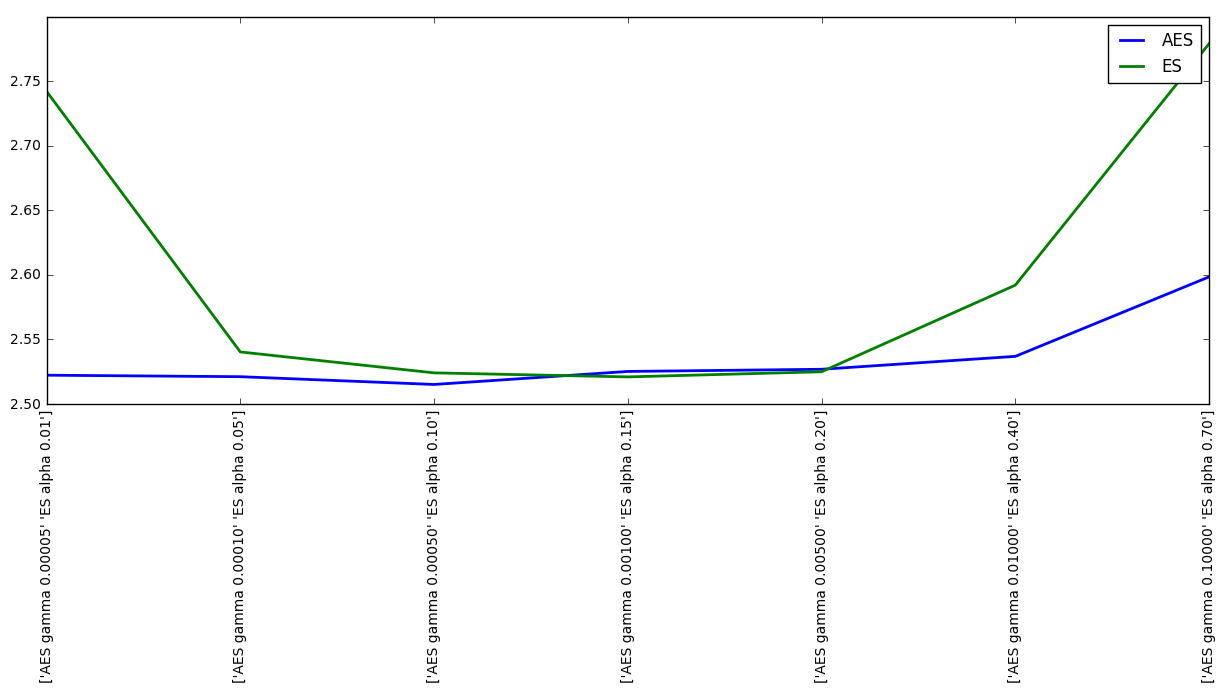

In [35]:
# compare ES methods
QualityStr = pd.DataFrame(index = ts.columns, columns = sorted(FRC_TS.keys()))

for model in sorted(QualityStr.columns):
    frc_ts = FRC_TS[model]
    QualityStr[model],_ = qualityMedianAE(ts, frc_ts)

QualityStr[sorted(QualityStr.columns)[:7]].mean().plot(color='b', label='AES', linewidth=2 )
ax = QualityStr[sorted(QualityStr.columns)[7:14]].mean().plot(color='g', label='ES', figsize = (15, 5), linewidth=2)
plt.legend()
ax.set_xticklabels(np.reshape(np.asarray(QualityStr.columns[:14]), (2, 7)).T , rotation=90)
# ax.set_xticklabels(df.C, rotation=90)

In [36]:
# Sort Quality
QualityStr[QualityStr.columns[:14]].mean().sort_values()

AES gamma 0.00050    2.515174
ES alpha 0.15        2.521031
AES gamma 0.00010    2.521195
AES gamma 0.00005    2.522354
ES alpha 0.10        2.524159
ES alpha 0.20        2.525013
AES gamma 0.00100    2.525256
AES gamma 0.00500    2.526935
AES gamma 0.01000    2.536929
ES alpha 0.05        2.540351
ES alpha 0.40        2.592065
AES gamma 0.10000    2.598462
ES alpha 0.01        2.742119
ES alpha 0.70        2.778990
dtype: float64

#### Заключение по ЭС

* Модели тип ЭС хорошо себя показывают на коротких временных рядах
* Достаточно просто можно адаптировать модели под разные особенность врменного ряда
* Убучение моделей типа ЭС (подбор оптимальных параметров) можно проводить на всём доступном периоде данных (оценку точности нужно проводить на отдельном периоде) 

## ARMA, ARIMA, ARIMAX

$$y_t = \underbrace{c+\sum_{i=1}^{p} \alpha_iy_{t-i}}\limits_{AR}+\underbrace{\sum_{j=1}^{q} \beta_j\varepsilon_{t-j}}\limits_{MA}+\varepsilon_t$$


$$y_t = \underbrace{c+\sum_{i=1}^{p} \alpha_iy_{t-i}}\limits_{AR}+\underbrace{\sum_{j=1}^{q} \beta_j\varepsilon_{t-j}}\limits_{MA}+\varepsilon_t$$
 
$\varepsilon_t$- случайная некоррелированная компонента, 

$$E\varepsilon_t=0, E\varepsilon_i\varepsilon_j=0$$

### ARIMA для прогнозирования временного ряда продаж

In [37]:
# удаляем пропуски: иначе нельзя
dta = ts[ts.columns[0]].dropna()
# dta

* Автокорреляционный анализ при построении ARIMA

https://onlinecourses.science.psu.edu/stat510/node/62

http://www.autobox.com/cms/index.php/blog/entry/build-or-make-your-own-arima-forecasting-model

http://statsmodels.sourceforge.net/devel/generated/statsmodels.tsa.stattools.acf.html

In [39]:
import statsmodels.api as sm
from scipy import stats

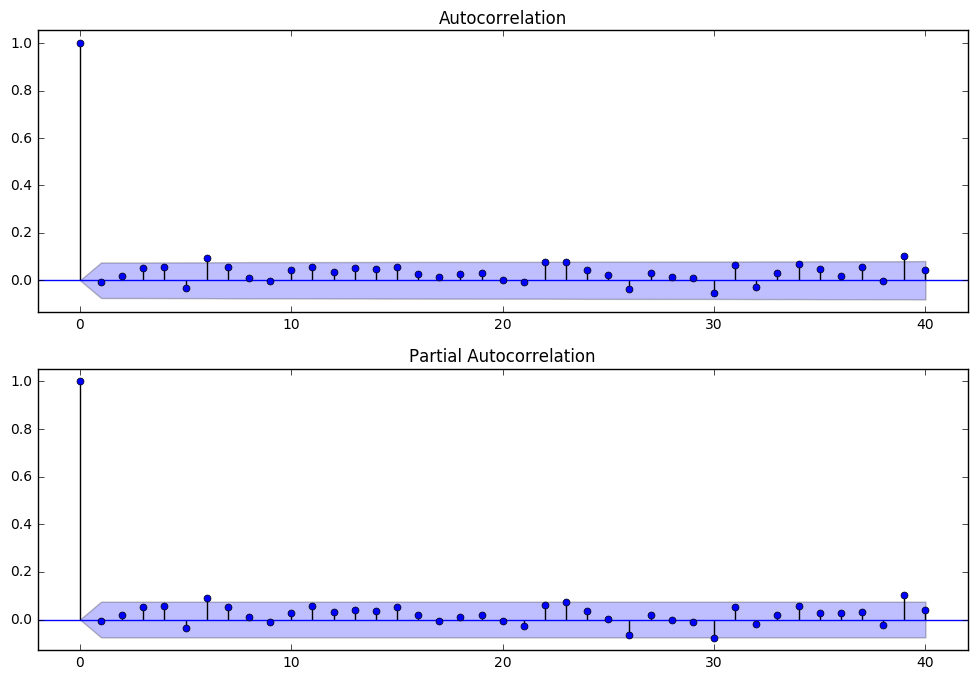

In [40]:
# Use Item 165
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta.values.squeeze(), lags=40, ax=ax2)

* построим самые простые варианты ARMA

In [41]:
arma_mod10 = sm.tsa.ARMA(dta, (1,0)).fit()
print(arma_mod10.params)
print(arma_mod10.aic, arma_mod10.bic, arma_mod10.hqic)

const               3.910796
ar.L1.Item:  165   -0.007255
dtype: float64
(3301.602584786089, 3315.1864585389567, 3306.8591498132796)


In [42]:
arma_mod01 = sm.tsa.ARMA(dta, (0,1)).fit()
print(arma_mod01.params)
print(arma_mod01.aic, arma_mod01.bic, arma_mod01.hqic)

const               3.910795
ma.L1.Item:  165   -0.006996
dtype: float64
(3301.603847883614, 3315.1877216364815, 3306.8604129108044)


* Статистика Дарбина Утосона:
 https://ru.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%94%D0%B0%D1%80%D0%B1%D0%B8%D0%BD%D0%B0_%E2%80%94_%D0%A3%D0%BE%D1%82%D1%81%D0%BE%D0%BD%D0%B0

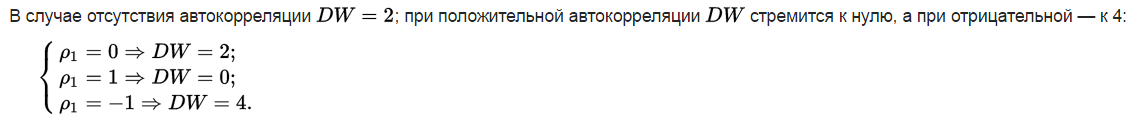

In [43]:
Image('pic/DarbinWatson.png')

In [44]:
# Darbin_Watson test
sm.stats.durbin_watson(arma_mod01.resid.values)

1.9894592955896726

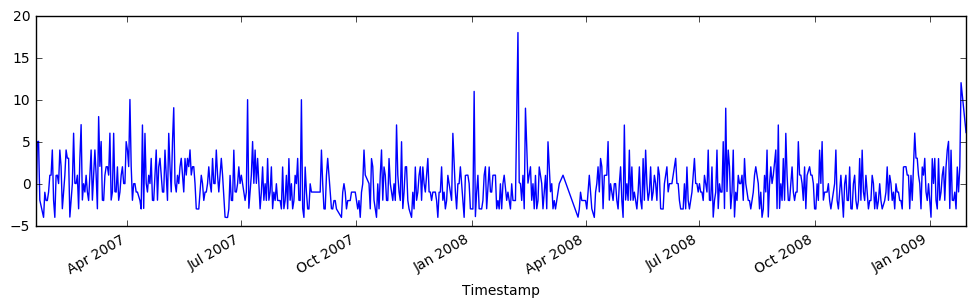

In [45]:
# plot residuals
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
ax = arma_mod01.resid.plot(ax=ax);

In [46]:
# Normal test
resid = arma_mod01.resid
stats.normaltest(resid)

NormaltestResult(statistic=212.08351416703624, pvalue=8.8440267461256245e-47)

* Нормальности явно нет, но мы всё же продолжим строить модель
* Ещё раз посмотрим на автокорреляционную функцию

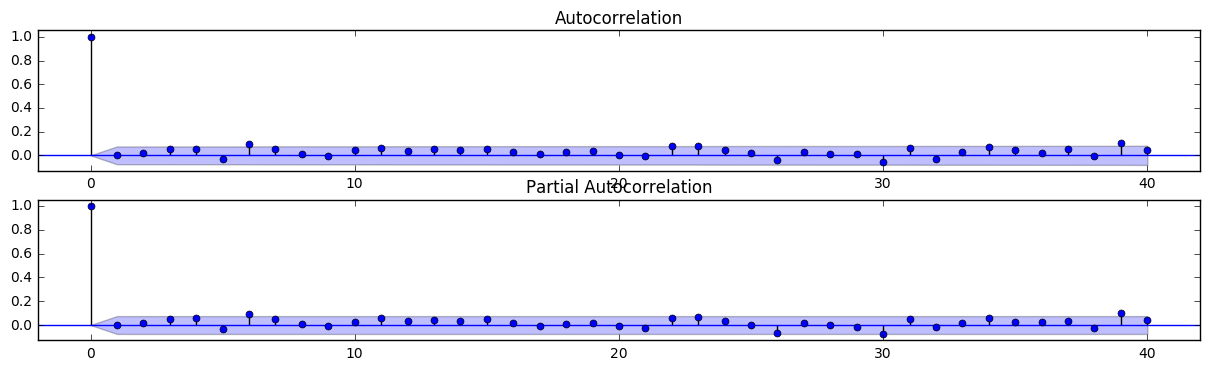

In [47]:
fig = plt.figure(figsize=(15,4))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [48]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0  -0.000119   0.000010  0.997512
2.0   0.018180   0.227398  0.892527
3.0   0.051004   2.019795  0.568308
4.0   0.057548   4.305060  0.366292
5.0  -0.031707   4.999802  0.415904
6.0   0.095845  11.357386  0.077939
7.0   0.056103  13.538901  0.060017
8.0   0.011613  13.632504  0.091861
9.0  -0.002443  13.636652  0.135850
10.0  0.044627  15.023150  0.131220
11.0  0.057814  17.353556  0.097844
12.0  0.035986  18.257807  0.108084
13.0  0.051329  20.100197  0.092740
14.0  0.049316  21.803492  0.082743
15.0  0.056200  24.018733  0.064776
16.0  0.025206  24.465007  0.079829
17.0  0.014184  24.606530  0.103870
18.0  0.028825  25.191932  0.119720
19.0  0.032562  25.940081  0.131867
20.0  0.003018  25.946519  0.167585
21.0 -0.005967  25.971719  0.207529
22.0  0.077311  30.208225  0.113491
23.0  0.076280  34.338749  0.060416
24.0  0.043199  35.665492  0.059124
25.0  0.021447  35.992992  0.071706
26.0 -0.035554  36.894418  0

### Прогнозирование с ARIMA на Validation Period

In [49]:
frc_arma = arma_mod01.predict('2008-12-30', '2008-12-31', dynamic=False)
print(frc_arma)

Timestamp
2008-12-30    3.917016
2008-12-31    3.924208
dtype: float64


C:\Users\rusrom\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\base\data.py:503: FutureWarning:

TimeSeries is deprecated. Please use Series



C:\Users\rusrom\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\tsa\arima_model.py:1724: FutureWarning:

TimeSeries is deprecated. Please use Series



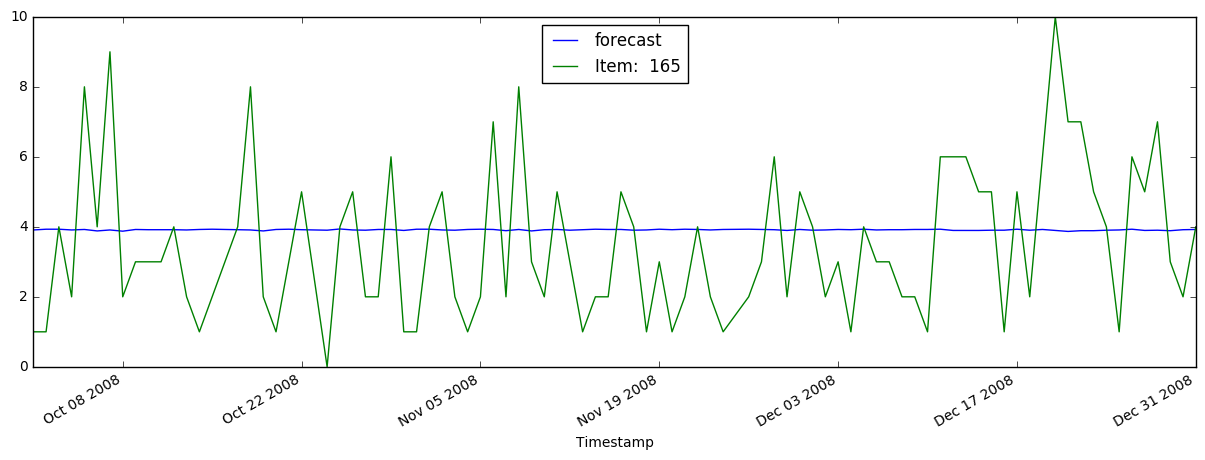

In [50]:
fig, ax = plt.subplots(figsize=(15,5),  linewidth=3.0)
fig = arma_mod01.plot_predict(start='2008-10-01', end='2008-12-31', ax=ax)

#### Прогноз на out-of-sample период

In [51]:
frc_arma = arma_mod01.forecast(steps=185)
print(frc_arma[1])

[ 2.69158051  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639  2.69164639
  2.69164639  2.69164639  2.69164639  2.69164639  2

## ARIMAX

In [52]:
energy_ts.columns

Index([u'Hub', u'ZSP', u'EnergyConsump', u'Temp1', u'Temp2', u'Temp3',
       u'Temp4', u'Temp5', u'Temp6', u'Temp7', u'Saturday', u'Sunday',
       u'Temp1_South_Less', u'Temp2_South_Less', u'Temp3_South_Less',
       u'Temp4_South_Less', u'Temp1_South_Gr', u'Temp2_South_Gr',
       u'Temp3_South_Gr', u'Temp4_South_Gr'],
      dtype='object')

In [53]:
dta = energy_ts[['EnergyConsump','Temp1', 'Temp2', 'Saturday','Sunday']].dropna()
exogs = dta[['Temp1', 'Temp2', 'Saturday','Sunday']][dta.index<'2015-05-01']
extra_exogs = dta[['Temp1', 'Temp2', 'Saturday','Sunday']]
dta = dta[['EnergyConsump']][dta.index<'2015-05-01']
extra_exogs.tail(13)

,Temp1,Temp2,Saturday,Sunday
Timestamp,,,,
2015-05-01,8.2,5.1,0.0,1.0
2015-05-02,7.5,4.9,1.0,0.0
2015-05-03,6.5,2.7,0.0,1.0
2015-05-04,7.5,3.1,0.0,1.0
2015-05-05,8.8,5.4,0.0,0.0
2015-05-06,16.0,10.6,0.0,0.0
2015-05-07,15.1,11.2,0.0,0.0
2015-05-08,10.5,9.6,0.0,0.0
2015-05-09,8.0,7.9,1.0,0.0


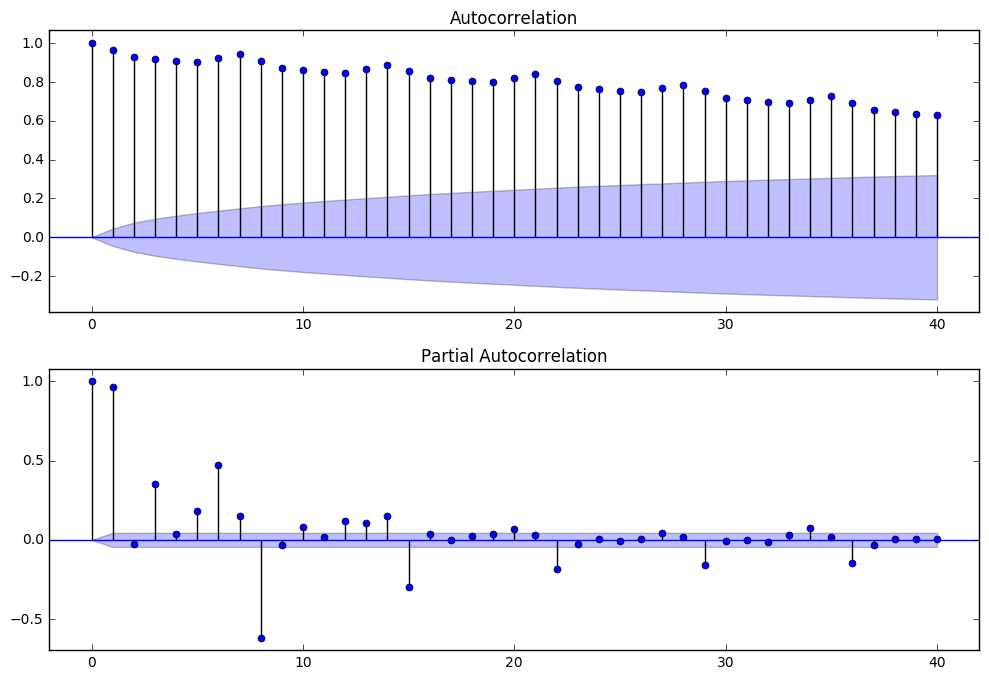

In [54]:
# Use energy data
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta.values.squeeze(), lags=40, ax=ax2)

** Вопрос**
 - какие авторегрессионные компоненты взять?

* только вспомогательные переменные

In [55]:
arima_mod000 = sm.tsa.ARIMA(dta, (0,0,0), exog=exogs).fit()
print(arima_mod000.params)
print(arima_mod000.aic, arima_mod000.bic, arima_mod000.hqic)

const       165786.199872
Temp1        -1472.723514
Temp2         -488.466321
Saturday     -9958.554880
Sunday      -12299.971714
dtype: float64
(40467.462212534301, 40500.903400110779, 40479.758125812972)


* только авторегрессионный прогноз

In [56]:
arima_mod710 = sm.tsa.ARIMA(dta, (7,1,0)).fit()
print(arima_mod710.params)
print(arima_mod710.aic, arima_mod710.bic, arima_mod710.hqic)

const                    1.870048
ar.L1.D.EnergyConsump   -0.080273
ar.L2.D.EnergyConsump   -0.181356
ar.L3.D.EnergyConsump   -0.127227
ar.L4.D.EnergyConsump   -0.083806
ar.L5.D.EnergyConsump   -0.190020
ar.L6.D.EnergyConsump   -0.042998
ar.L7.D.EnergyConsump    0.617715
dtype: float64
(37575.45228215504, 37625.609437459512, 37593.894930392678)


* и авторегрессия и вспомогательные переменные

In [57]:
arima_mod710_ex = sm.tsa.ARIMA(dta, (7,1,0), exog=exogs).fit()
print(arima_mod710_ex.params)
print(arima_mod710_ex.aic, arima_mod710_ex.bic, arima_mod710_ex.hqic)

const                     2342.900406
Temp1                       57.586023
Temp2                     -105.159365
Saturday                -11256.039610
Sunday                   -4540.695095
ar.L1.D.EnergyConsump       -0.017472
ar.L2.D.EnergyConsump       -0.032838
ar.L3.D.EnergyConsump       -0.109722
ar.L4.D.EnergyConsump       -0.082320
ar.L5.D.EnergyConsump       -0.050773
ar.L6.D.EnergyConsump       -0.022363
ar.L7.D.EnergyConsump        0.586471
dtype: float64
(37268.213791787486, 37340.663016116167, 37294.853172575182)


C:\Users\rusrom\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [58]:
arima_mod910_ex = sm.tsa.ARIMA(dta, (9,1,0), exog=exogs).fit()
print(arima_mod910_ex.params)
print(arima_mod910_ex.aic, arima_mod910_ex.bic, arima_mod910_ex.hqic)

const                     2519.366385
Temp1                      136.869813
Temp2                     -160.896848
Saturday                -10476.775169
Sunday                   -8954.911408
ar.L1.D.EnergyConsump        0.192624
ar.L2.D.EnergyConsump        0.009757
ar.L3.D.EnergyConsump       -0.085329
ar.L4.D.EnergyConsump       -0.062105
ar.L5.D.EnergyConsump       -0.138750
ar.L6.D.EnergyConsump        0.035232
ar.L7.D.EnergyConsump        0.555617
ar.L8.D.EnergyConsump       -0.113736
ar.L9.D.EnergyConsump       -0.170689
dtype: float64
(37198.56233547239, 37282.157594313176, 37229.300082535112)


C:\Users\rusrom\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [59]:
print(arima_mod710_ex.summary())

                             ARIMA Model Results                              
Dep. Variable:        D.EnergyConsump   No. Observations:                 1945
Model:                 ARIMA(7, 1, 0)   Log Likelihood              -18621.107
Method:                       css-mle   S.D. of innovations           3477.347
Date:                Wed, 02 Nov 2016   AIC                          37268.214
Time:                        14:14:49   BIC                          37340.663
Sample:                    01-02-2010   HQIC                         37294.853
                         - 04-30-2015                                         
                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
const                  2342.9004        nan        nan        nan           nan       nan
Temp1                    57.5860     28.842      1.997      0.046         1.058   114.114
Temp2   

C:\Users\rusrom\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\tsa\arima_model.py:1847: FutureWarning:

TimeSeries is deprecated. Please use Series



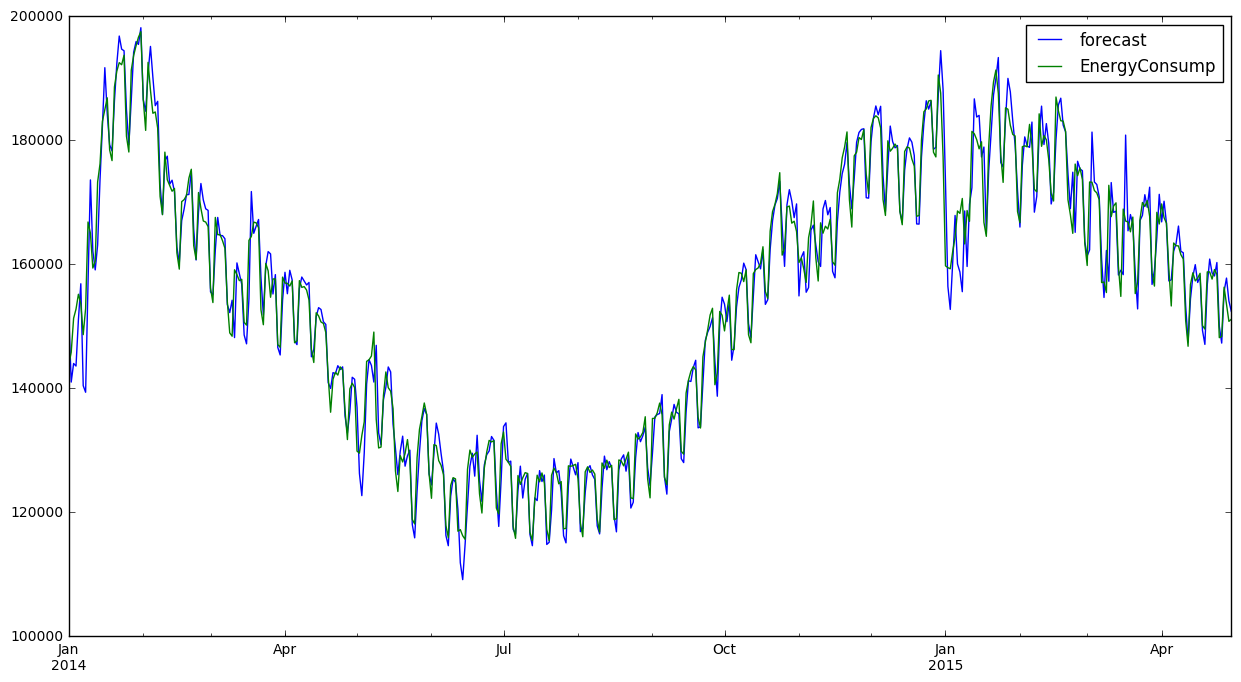

In [60]:
fig, ax = plt.subplots(figsize=(15,8),  linewidth=3.0)
fig = arima_mod710_ex.plot_predict(start='2014-01-01', end='2015-04-30', ax=ax)
# legend = ax.legend(loc='upper left')

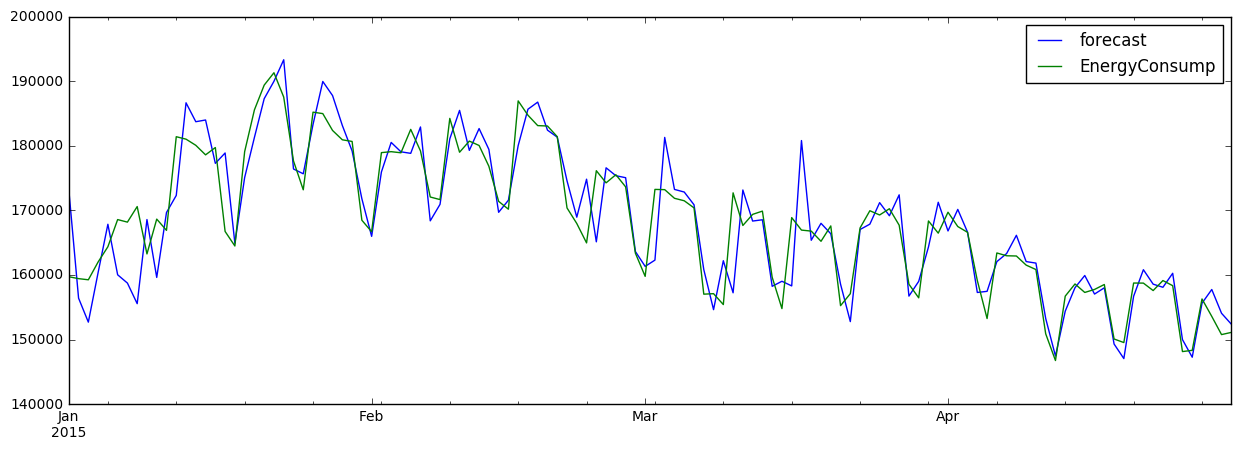

In [61]:
fig, ax = plt.subplots(figsize=(15,5),  linewidth=3.0)
fig = arima_mod710_ex.plot_predict(start='2015-01-01', end='2015-04-30', ax=ax)
# legend = ax.legend(loc='upper left')

In [62]:
# fig, ax = plt.subplots(figsize=(15,8),  linewidth=3.0)
# fig = arima_mod710_ex.plot_forecast(185)
frc = arima_mod710_ex.forecast(steps = 13, exog = extra_exogs[extra_exogs.index>='2015-05-01'])

frc_arimax = extra_exogs[extra_exogs.index>='2015-05-01']
frc_arimax['FRC'] = frc[0]
frc_arimax['EnergyConsumption'] = dta['EnergyConsumption'][dta.index>='2015-05-01']
frc[0]

C:\Users\rusrom\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



array([ 147256.05384479,  138212.0871645 ,  138423.25255513,
        140229.53316381,  139737.89998648,  138529.70421458,
        138861.93763051,  139864.31316752,  130972.49406226,
        130252.05973456,  130604.42028857,  131161.14504858,
        131317.38306456])

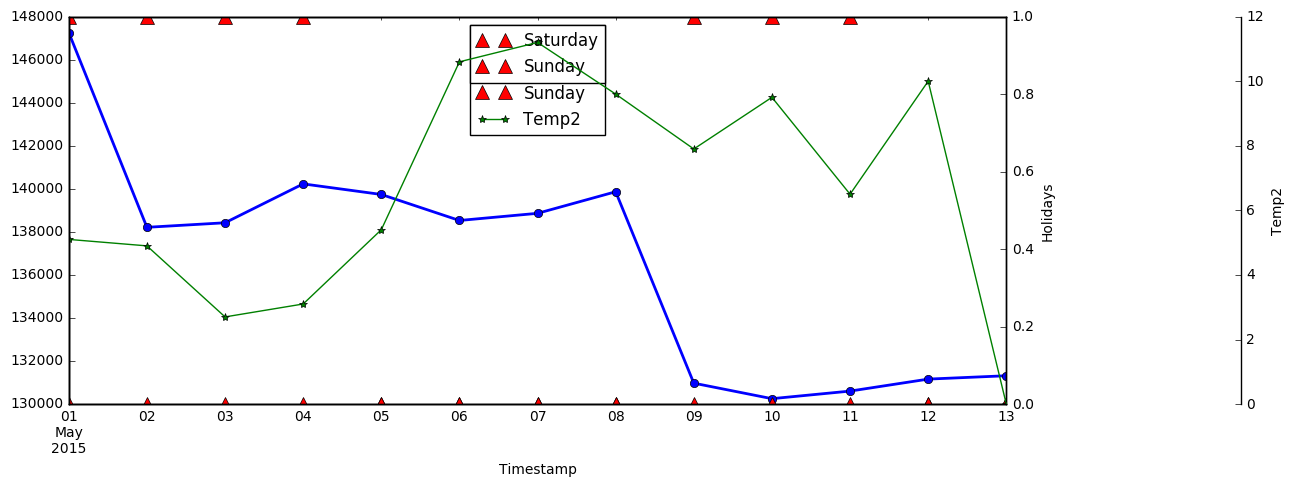

In [167]:
fig, ax = plt.subplots(figsize=(15,5))

ax2, ax3 = ax.twinx(), ax.twinx()
ax2.set_ylabel('Holidays')
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
ax3.set_ylabel('Temp2')
fig.subplots_adjust(right=0.75)

frc_arimax[['FRC', ].tail(186).plot(ax = ax,  style='b-', marker = 'o', linewidth=2.0)
frc_arimax['EnergyConsump'].tail(186).plot(ax = ax,  style='k-', marker = 'x', linewidth=2.0)
frc_arimax[['Saturday', 'Sunday']].tail(186).plot(ax = ax2, style='r', marker = '^', markersize = 10.0, linewidth=0.0)
frc_arimax['Temp2'].tail(186).plot(ax = ax3,  style='g-', marker='*')

lines = ax.get_lines() + ax2.get_lines() + ax3.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper center')

## Онлайн прогнозирование с ARIMA

In [93]:
def myARMA(x, h, Params): # see statsmodels.ARMA
    
    # Параметры алгоритма
    p = Params['p']
    q = Params['q']
    
    start = ts.index[-1]+timedelta(1)
    end = ts.index[-1]+timedelta(h)
    rng = pd.date_range(start, end)
    frc_ts = pd.Series(index = x.index.append(rng))

    for t in range(len(x.index)): # итерационный процесс для честного прогнозирования
#         y = pd.Series(index = x.index[:t+1]
        y = x[:t+1]
        if not y.dropna().empty:
    #        return frc_ts
    #    else:
            try:
                arma_mod = sm.tsa.ARMA(y.dropna(), (p,q)).fit()
                frc_ts[t+h-1] = arma_mod.predict(start = y.index[-1]) # возвращаем последнее предсказанное значение
            except Exception:
                print("Can not fit model p=%d, q=%d at step t=%d!" % (p, q, t))
        
    # Извлекаем прогноз
    #start = notnan_x.index[0].to_datetime().strftime("%Y-%m-%d")
    #end = notnan_x.index[len(notnan_x)-1].to_datetime().strftime("%Y-%m-%d")

    return frc_ts.ffill()

In [101]:
# ВНИМАНИЕ: расчёты длятся долго
# ACHTUNG: takes a lot of time

#Build  forecast
P = [1]
# FRC_TS = dict()
h = 1
q = 0
ts_num = 4

for p_cntr in P:
    frc_ts = pd.DataFrame(index = ts.index.append(rng))
    Params ={'p':p_cntr, 'q': q}
    for ts_num in ts.columns[4]:
        x = ts[ts_num]
        frc_ts[ts_num] = myARMA(x, h, Params)
    FRC_TS['ARMA p={1}, q={0}'.format(p_cntr,q)] = frc_ts

Can not fit model p=1, q=0 at step t=721!
Can not fit model p=1, q=0 at step t=722!
Can not fit model p=1, q=0 at step t=732!
Can not fit model p=1, q=0 at step t=733!
Can not fit model p=1, q=0 at step t=734!
Can not fit model p=1, q=0 at step t=735!
Can not fit model p=1, q=0 at step t=736!
Can not fit model p=1, q=0 at step t=741!
Can not fit model p=1, q=0 at step t=742!
Can not fit model p=1, q=0 at step t=751!
Can not fit model p=1, q=0 at step t=779!
Can not fit model p=1, q=0 at step t=810!
Can not fit model p=1, q=0 at step t=840!
Can not fit model p=1, q=0 at step t=871!
Can not fit model p=1, q=0 at step t=887!
Can not fit model p=1, q=0 at step t=901!
Can not fit model p=1, q=0 at step t=932!
Can not fit model p=1, q=0 at step t=958!
Can not fit model p=1, q=0 at step t=962!
Can not fit model p=1, q=0 at step t=963!
Can not fit model p=1, q=0 at step t=971!
Can not fit model p=1, q=0 at step t=972!
Can not fit model p=1, q=0 at step t=978!
Can not fit model p=1, q=0 at step

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=163!
Can not fit model p=1, q=0 at step t=165!
Can not fit model p=1, q=0 at step t=166!
Can not fit model p=1, q=0 at step t=167!
Can not fit model p=1, q=0 at step t=168!
Can not fit model p=1, q=0 at step t=172!
Can not fit model p=1, q=0 at step t=174!
Can not fit model p=1, q=0 at step t=177!
Can not fit model p=1, q=0 at step t=178!
Can not fit model p=1, q=0 at step t=179!
Can not fit model p=1, q=0 at step t=180!
Can not fit model p=1, q=0 at step t=181!
Can not fit model p=1, q=0 at step t=183!
Can not fit model p=1, q=0 at step t=187!
Can not fit model p=1, q=0 at step t=188!
Can not fit model p=1, q=0 at step t=190!
Can not fit model p=1, q=0 at step t=191!
Can not fit model p=1, q=0 at step t=192!
Can not fit model p=1, q=0 at step t=193!
Can not fit model p=1, q=0 at step t=195!
Can not fit model p=1, q=0 at step t=196!
Can not fit model p=1, q=0 at step t=197!
Can not fit model p=1, q=0 at step t=198!
Can not fit model p=1, q=0 at ste

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=891!
Can not fit model p=1, q=0 at step t=894!
Can not fit model p=1, q=0 at step t=895!
Can not fit model p=1, q=0 at step t=896!
Can not fit model p=1, q=0 at step t=898!
Can not fit model p=1, q=0 at step t=899!
Can not fit model p=1, q=0 at step t=902!
Can not fit model p=1, q=0 at step t=907!
Can not fit model p=1, q=0 at step t=908!
Can not fit model p=1, q=0 at step t=909!
Can not fit model p=1, q=0 at step t=910!
Can not fit model p=1, q=0 at step t=911!
Can not fit model p=1, q=0 at step t=912!
Can not fit model p=1, q=0 at step t=913!
Can not fit model p=1, q=0 at step t=914!
Can not fit model p=1, q=0 at step t=915!
Can not fit model p=1, q=0 at step t=916!
Can not fit model p=1, q=0 at step t=917!
Can not fit model p=1, q=0 at step t=918!
Can not fit model p=1, q=0 at step t=919!
Can not fit model p=1, q=0 at step t=920!
Can not fit model p=1, q=0 at step t=921!
Can not fit model p=1, q=0 at step t=922!
Can not fit model p=1, q=0 at ste

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=127!
Can not fit model p=1, q=0 at step t=128!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=129!
Can not fit model p=1, q=0 at step t=130!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=131!
Can not fit model p=1, q=0 at step t=132!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=133!
Can not fit model p=1, q=0 at step t=134!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=135!
Can not fit model p=1, q=0 at step t=136!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=137!
Can not fit model p=1, q=0 at step t=138!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=139!
Can not fit model p=1, q=0 at step t=140!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=141!
Can not fit model p=1, q=0 at step t=142!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=143!
Can not fit model p=1, q=0 at step t=144!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=145!
Can not fit model p=1, q=0 at step t=146!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=147!
Can not fit model p=1, q=0 at step t=148!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=149!
Can not fit model p=1, q=0 at step t=150!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=151!
Can not fit model p=1, q=0 at step t=152!

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=153!
Can not fit model p=1, q=0 at step t=157!
Can not fit model p=1, q=0 at step t=158!
Can not fit model p=1, q=0 at step t=159!
Can not fit model p=1, q=0 at step t=160!
Can not fit model p=1, q=0 at step t=161!
Can not fit model p=1, q=0 at step t=162!
Can not fit model p=1, q=0 at step t=163!
Can not fit model p=1, q=0 at step t=164!
Can not fit model p=1, q=0 at step t=165!
Can not fit model p=1, q=0 at step t=166!
Can not fit model p=1, q=0 at step t=167!
Can not fit model p=1, q=0 at step t=168!
Can not fit model p=1, q=0 at step t=169!
Can not fit model p=1, q=0 at step t=170!
Can not fit model p=1, q=0 at step t=171!
Can not fit model p=1, q=0 at step t=172!
Can not fit model p=1, q=0 at step t=173!
Can not fit model p=1, q=0 at step t=174!
Can not fit model p=1, q=0 at step t=175!
Can not fit model p=1, q=0 at step t=176!
Can not fit model p=1, q=0 at step t=177!
Can not fit model p=1, q=0 at step t=178!
Can not fit model p=1, q=0 at ste

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\rusrom\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Can not fit model p=1, q=0 at step t=1312!
Can not fit model p=1, q=0 at step t=1322!
Can not fit model p=1, q=0 at step t=1386!
Can not fit model p=1, q=0 at step t=1435!
Can not fit model p=1, q=0 at step t=1451!
Can not fit model p=1, q=0 at step t=1452!
Can not fit model p=1, q=0 at step t=1453!
Can not fit model p=1, q=0 at step t=1468!
Can not fit model p=1, q=0 at step t=1469!
Can not fit model p=1, q=0 at step t=1470!
Can not fit model p=1, q=0 at step t=1471!
Can not fit model p=1, q=0 at step t=1472!
Can not fit model p=1, q=0 at step t=1474!
Can not fit model p=1, q=0 at step t=1475!
Can not fit model p=1, q=0 at step t=1476!
Can not fit model p=1, q=0 at step t=1477!
Can not fit model p=1, q=0 at step t=1478!
Can not fit model p=1, q=0 at step t=1479!
Can not fit model p=1, q=0 at step t=1480!
Can not fit model p=1, q=0 at step t=1481!
Can not fit model p=1, q=0 at step t=1482!
Can not fit model p=1, q=0 at step t=1483!
Can not fit model p=1, q=0 at step t=1484!
Can not fi

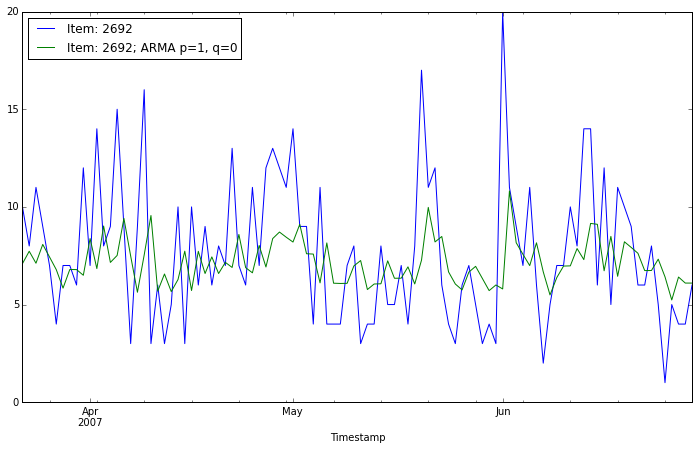

In [102]:
# ts VS forecast in first 100 steps
model_num = [0]  # [0,6], [0,4,6]
Models = sorted(FRC_TS.keys())

ts_num = 4 # 7
plot_ts = pd.DataFrame(index =ts.index)
plot_ts[ts.columns[ts_num]] = ts[ts.columns[ts_num]]
for model in model_num:
     frc_ts = FRC_TS[Models[model]]
     plot_ts[ts.columns[ts_num]+'; '+Models[model]] = frc_ts[ts.columns[ts_num]]

plot_ts.ix[800:900].plot(figsize = (12, 7)) # :250

In [105]:
# Quality 
print('MACAPE: %.2f'% qualityMACAPE(ts[ts.columns[ts_num]], frc_ts[ts.columns[ts_num]])[0])
print('RMSE: %.1f'% qualityRMSE(ts[ts.columns[ts_num]], frc_ts[ts.columns[ts_num]])[0])

MACAPE: 0.50
RMSE: 3.9


### Заключение

* На коротких временных рядах используёте простые адаптивные алгоритмы прогнозирования
* Для временных рядов с хорошо заметной структурой используйте авторегрессионные подходы
* комбинирование алгоритмов прогнозирования позволяют сократить время на ручной анализ каждого временного ряда  

* Time series forecasting in Python
    - http://www.statsmodels.org/stable/
    - http://www.pyflux.com/
    - http://rpy2.bitbucket.org/